In [1]:
from pathlib import Path

import matplotlib
import pandas as pd
import seaborn as sn
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams['font.family'] = "monospace"
plt.rcParams['savefig.facecolor'] = 'white'
sn.set_context("poster")

out_dir = Path.cwd().parent.parent / "Latex" / "figures" / "05_results"

In [2]:
# batch_id 39 is the sweep with all the embeddings (except Vanilla)
# batch_id 44 is the sweep with just vanilla
# batch_id 41 is seq2seq and jtvae (not a full sweep)
# batch_id 42 is the result of running the best hyperparameters again for each
# batch_id 43 is the result of running the best hparams again for Vanilla
results = seml.get_results(
    "cpa_transf",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={"batch_id": {"$in": [39, 44, 41, 42, 43]}}
)

  0%|          | 0/117 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

/home/simon/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,...,result.test,result.ood,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.total_epochs,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path
0,169,57aeb6f79610117cb136cc708fd0f664,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.8943176845709483, 0.6972129096587499, -0.1...","[[0.8957589997776917, 0.7072618342936039, -0.2...",[0.5358360409736633],[5.6258790436005626e-05],[[0.9642669558525085]],[[0.012195121951219513]],400,NaN,NaN,NaN
1,170,904486089df9b4dd956380d01c3371f7,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.8457769165436427, 0.5143802344799042, -0.1...","[[0.8448535507278783, 0.5099279162074838, -0.1...",[0.11641369014978409],[5.6258790436005626e-05],[[0.550268828868866]],[[0.012195121951219513]],175,NaN,NaN,NaN
2,171,0dd213083c65bb802fefe8ebf2b6241c,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.8603245163957278, 0.5460213283697765, -0.1...","[[0.8618022506790501, 0.5518271034317357, -0.2...",[0.20903712511062622],[5.6258790436005626e-05],[[0.8080918192863464]],[[0.012195121951219513]],325,NaN,NaN,NaN
3,172,ff136af1ed5ed1e3d6206f633268e5ce,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.8943708345293999, 0.7032853504021962, -0.1...","[[0.8955797382763454, 0.7134933168334621, -0.2...",[0.36966899037361145],[5.6258790436005626e-05],[[0.891040563583374]],[[0.012195121951219513]],125,NaN,NaN,NaN
4,173,7f33f7a4b8fea81bfa08586f56f76d69,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.8724167585372925, 0.618253692984581, -0.19...","[[0.8735198729804584, 0.6245436194751944, -0.2...",[0.6628760695457458],[5.6258790436005626e-05],[[0.8524210453033447]],[[0.012195121951219513]],192,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,285,4bcee367c32bfd2ce8f00ab991e0b3fd,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/model.py, 61dc4f83e29b4c9b01c09384],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,"[[0.9052090426286061, 0.7569693773984909, -0.1...","[[0.9104305835706847, 0.780115429844175, -0.16...",[0.09858685731887817],[5.6258790436005626e-05],[[0.5169783234596252]],[[0.012195121951219513]],150,False,NaN,NaN
113,286,86755884bc60938691ebc433d5671ba6,compert/seml_sweep_icb.py,chemical_C

# Looking at the results
Which things are we interested in?
- Which were the best 3 runs? Print their configurations
- Maybe print embeddings against each other
- Print all the loss curves during reconstruction

In [4]:
sweeped_cols = [
    "model.hparams.dropout",
    "model.hparams.dim",
    "model.hparams.dosers_width",
    "model.hparams.dosers_depth",
    "model.hparams.dosers_lr",
    "model.hparams.dosers_wd",
    "model.hparams.autoencoder_width",
    "model.hparams.autoencoder_depth",
    "model.hparams.autoencoder_lr",
    "model.hparams.autoencoder_wd",
    "model.hparams.adversary_width",
    "model.hparams.adversary_depth",
    "model.hparams.adversary_lr",
    "model.hparams.adversary_wd",
    "model.hparams.adversary_steps",
    "model.hparams.reg_adversary",
    "model.hparams.penalty_adversary",
    "model.hparams.batch_size",
    "model.hparams.step_size_lr",
    "model.hparams.embedding_encoder_width",
    "model.hparams.embedding_encoder_depth",
    "model.embedding.model"
]

In [5]:
# percentage of training runs that resulted in NaNs
import math

results["config.model.embedding.model"] = results["config.model.embedding.model"].fillna("vanilla")
nan_results = results[results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))]
results_clean = results[~results["result.loss_reconstruction"].apply(lambda x: math.isnan(sum(x)))].copy()
print(len(nan_results) / len(results))

0.0


In [6]:
nan_results["config.model.embedding.model"].value_counts()

Series([], Name: config.model.embedding.model, dtype: int64)

In [7]:
results_clean["config.model.embedding.model"].value_counts()

grover_base    21
MPNN           21
rdkit          21
weave          21
vanilla        21
jtvae           6
seq2seq         6
Name: config.model.embedding.model, dtype: int64

## Goals
What are we most interested in:
- Maybe a plot over all embeddings. Which ones performed best?
- Is the adversarial loss in the right ballpark?
- Which ones where the best hyperparameters?

In [8]:
# rename for cleanliness
results_clean["config.model.embedding.model"] = results_clean["config.model.embedding.model"].replace("grover_base",
                                                                                                      "GROVER")
results_clean["config.model.embedding.model"] = results_clean["config.model.embedding.model"].replace("rdkit", "RDKit")

# calculate some stats
results_clean["result.val_agg_mean"] = results_clean["result.test"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.val_agg_mean"] = results_clean["result.test"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(lambda x: x[0][1])
results_clean["result.test_agg_mean"] = results_clean["result.ood"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(lambda x: x[0][1])
results_clean["result.training_agg_mean"] = results_clean["result.training"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(lambda x: x[0][1])
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(
    lambda x: x[0])
results_clean

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,...,result.total_epochs,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,result.val_agg_mean,result.val_mean_de,result.test_agg_mean,result.test_mean_de,result.training_agg_mean,result.training_mean_de
0,169,57aeb6f79610117cb136cc708fd0f664,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,400,NaN,NaN,NaN,0.232369,0.697213,0.223438,0.707262,0.231081,0.709562
1,170,904486089df9b4dd956380d01c3371f7,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,175,NaN,NaN,NaN,0.213407,0.514380,0.196883,0.509928,0.242731,0.616389
2,171,0dd213083c65bb802fefe8ebf2b6241c,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,325,NaN,NaN,NaN,0.190624,0.546021,0.169759,0.551827,0.217540,0.637802
3,172,ff136af1ed5ed1e3d6206f633268e5ce,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,125,NaN,NaN,NaN,0.269890,0.703285,0.225624,0.713493,0.254312,0.689706
4,173,7f33f7a4b8fea81bfa08586f56f76d69,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/seml_sweep_icb.py, 61d3e62554ad86285...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,192,NaN,NaN,NaN,0.214393,0.618254,0.191479,0.624544,0.232142,0.636693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,285,4bcee367c32bfd2ce8f00ab991e0b3fd,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/model.py, 61dc4f83e29b4c9b01c09384],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,150,False,NaN,NaN,0.313787,0.756969,0.296750,0.780115,0.308746,0.770628
113,286,86755884bc60938691ebc433d5671ba6,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/model.py, 61dc4f83e29b4c9b01c09384],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,175,False,NaN,NaN,0.383258,0.810301,0.368770,0.830765,0.343636,0.817955
114,287,4915c8c288813fee8f8c7812d2f7a5b8,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/model.py, 61dc4f83e29b4c9b01c09384],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,211,False,NaN,NaN,0.455203,0.866260,0.454306,0.878321,0.197333,0.899426
115,288,a005f80114e57451e11c86cfe3eb3fc3,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Mas

## When did early stopping happen?

Text(0.5, 1.0, 'Total epochs before final stopping (min 125)')

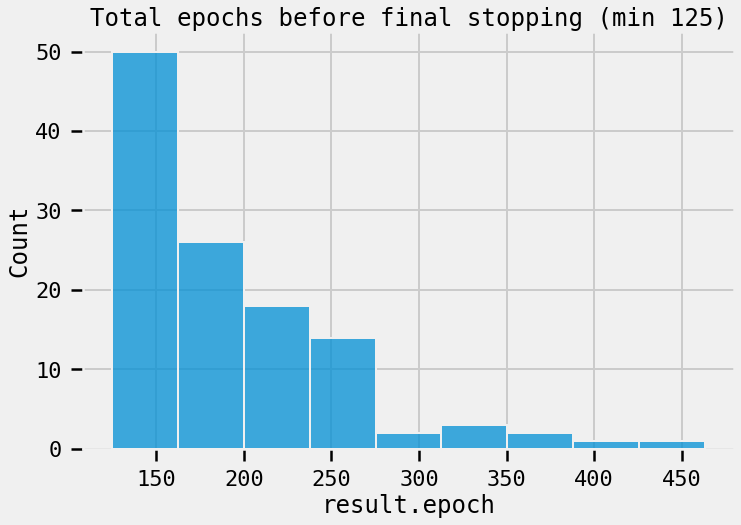

In [56]:
ax = sn.histplot(data=results_clean["result.epoch"].apply(max))
ax.set_title("Total epochs before final stopping (min 125)")

## Looking at the test results over all runs

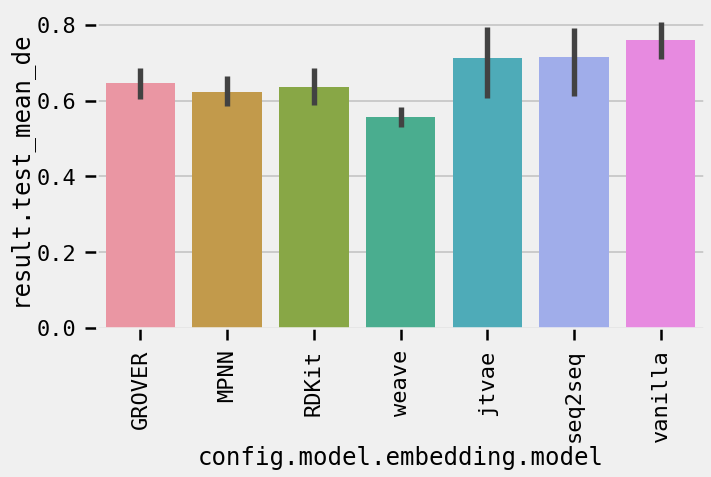

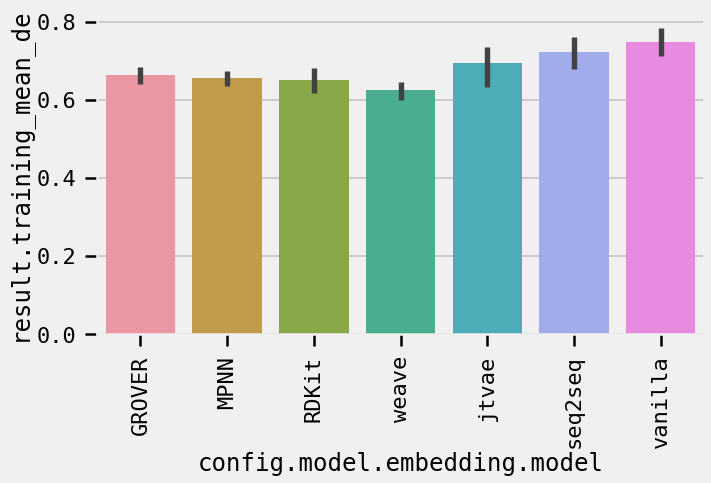

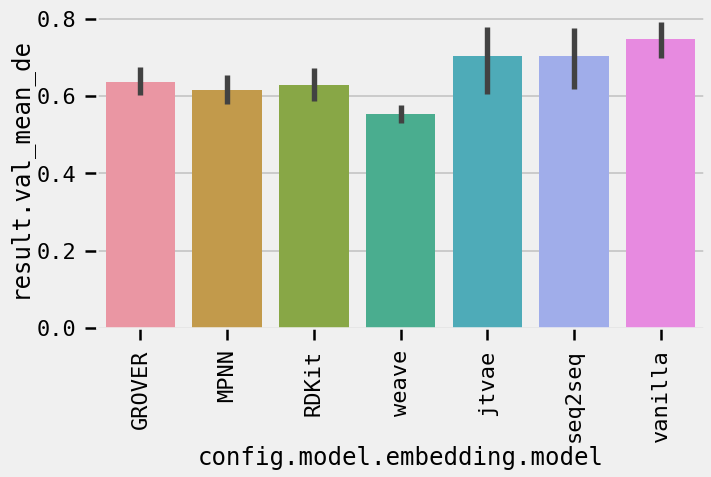

In [57]:
for y in ("result.test_mean_de", "result.training_mean_de", "result.val_mean_de"):
    fig = plt.figure()
    ax = sn.barplot(data=results_clean,
                    x="config.model.embedding.model", y=y)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    # fig.savefig(out_dir / f"LINCS_pretraining_{y}.png", dpi=300, bbox_inches="tight",
    #            facecolor="white", transparent=True)
    plt.show()


## Looking at just the best few runs (w/ reasonable disentanglement)
- How many successful runs did we have for each?
- What do the scores look like
- What do the parameter configurations look like?

GROVER 4
MPNN 2
RDKit 3
weave 4
jtvae 3
seq2seq 3
vanilla 7


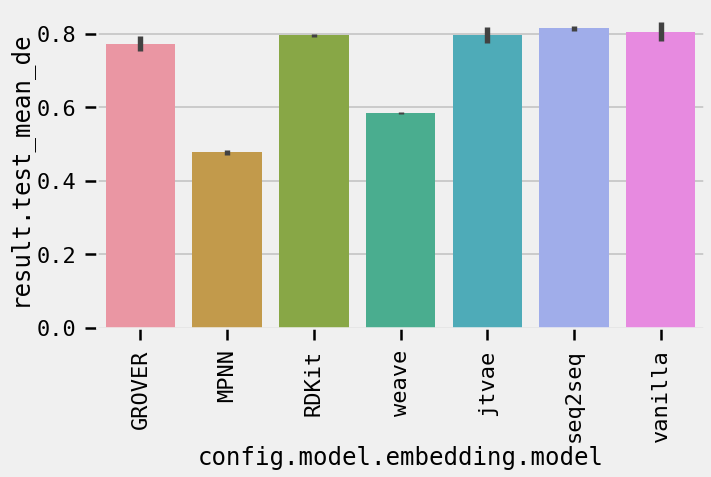

,config.model.hparams.dropout,config.model.hparams.dim,config.model.hparams.dosers_width,config.model.hparams.dosers_depth,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.autoencoder_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,...,config.model.hparams.adversary_steps,config.model.hparams.reg_adversary,config.model.hparams.penalty_adversary,config.model.hparams.batch_size,config.model.hparams.step_size_lr,config.model.hparams.embedding_encoder_width,config.model.hparams.embedding_encoder_depth,config.model.embedding.model,result.perturbation disentanglement,result.test_mean_de
9,0.354036,256,256,2,0.002607,1.331122e-06,256,5,0.002607,1.331122e-06,...,2,6.796578,1.331122,512,100,512,3,GROVER,0.085613,0.794968
90,0.354036,256,256,2,0.002607,1.000000e-06,256,5,0.002607,1.000000e-06,...,2,6.796578,1.331122,512,100,512,3,GROVER,0.049975,0.752939
27,0.433088,128,512,1,0.005399,3.967605e-06,512,4,0.005399,3.967605e-06,...,3,29.154432,3.967605,512,100,512,3,MPNN,0.082869,0.484434
32,0.416221,256,128,3,0.004623,3.142881e-06,512,5,0.004623,3.142881e-06,...,3,21.368329,3.142881,128,50,256,4,MPNN,0.012117,0.470478
92,0.354036,256,256,2,0.002607,1.000000e-06,256,5,0.002607,1.000000e-06,...,2,6.796578,1.331122,512,100,512,3,RDKit,0.049420,0.800476
49,0.354036,256,256,2,0.002607,1.331122e-06,256,5,0.002607,1.331122e-06,...,2,6.796578,1.331122,512,100,512,3,RDKit,0.081268,0.792626
69,0.354036,256,256,2,0.002607,1.331122e-06,256,5,0.002607,1.331122e-06,...,2,6.796578,1.331122,512,100,512,3,weave,0.099364,0.586929
93,0.354036,256,256,2,0.002607,1.000000e-06,256,5,0.002607,1.000000e-06,...,2,6.796578,1.331122,512,100,512,3,weave,0.059714,0.582219
94,0.354036,256,256,2,0.002607,1.000000e-06,256,5,0.002607,1.000000e-06,...,2,6.796578,1.331122,512,100,512,3,jtvae,0.047041,0.818745
83,0.299329,128,512,1,0.001575,6.251374e-07,512,3,0.001575,6.251374e-07,...,2,30.049874,3.968793,512,200,512,5,jtvae,0.090371,0.776665


In [63]:
best = []
for embedding in list(results_clean["config.model.embedding.model"].unique()):
    df = results_clean[(results_clean["config.model.embedding.model"] == embedding) &
                       # (results_clean["config.model.hparams.dim"] == 64) &
                       (results_clean["result.perturbation disentanglement"] < 0.10)]
    print(embedding, len(df))
    best.append(df.sort_values(by="result.val_mean_de", ascending=False).head(2))

best = pd.concat(best)
fig = plt.figure()
ax = sn.barplot(data=best,
                x="config.model.embedding.model", y="result.test_mean_de")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

best[["config." + col for col in sweeped_cols] +
     ["result.perturbation disentanglement", "result.test_mean_de"]]

## Plotting some results for the "Best HPs"
The best HP's were selected from the above table, and then re-run on the cluster with more patience

In [64]:
# batch_id 42 is the result of running the best hyperparameters again for each
# batch_id 43 is the result of running the best hparams again for Vanilla
results_clean = seml.get_results(
    "cpa_transf",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={"batch_id": {"$in": [42, 43]}}
)
results_clean["config.model.embedding.model"] = results_clean["config.model.embedding.model"].fillna("vanilla")

results_clean["result.val_agg_mean"] = results_clean["result.test"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(lambda x: x[0][1])
results_clean["result.test_agg_mean"] = results_clean["result.ood"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(lambda x: x[0][1])
results_clean["result.training_agg_mean"] = results_clean["result.training"].apply(lambda x: sum(x[0]) / len(x[0]))
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(lambda x: x[0][1])
results_clean["result.perturbation disentanglement"] = results_clean["result.perturbation disentanglement"].apply(
    lambda x: x[0])
results_clean

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

/home/simon/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,...,result.total_epochs,config.model.load_pretrained,config.model.pretrained_model_hashes,config.model.pretrained_model_path,result.val_agg_mean,result.val_mean_de,result.test_agg_mean,result.test_mean_de,result.training_agg_mean,result.training_mean_de
0,263,adf3d3c9544814688dab8630028c3f79,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,175,NaN,NaN,NaN,0.304806,0.743226,0.271573,0.752939,0.275404,0.691713
1,264,b29dced873a1a36e4564f4fed0e874f3,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,200,NaN,NaN,NaN,0.345434,0.782070,0.312342,0.795567,0.298315,0.730526
2,265,ad76fb60433c2da0498f9afda4f8939c,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with overwrit...,...,225,NaN,NaN,NaN,0.333091,0.771187,0.306341,0.800476,0.284496,0.742636
3,266,e7842b1121ae09fa900c10f6ec68aafb,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,150,NaN,NaN,NaN,0.265651,0.563460,0.252962,0.582219,0.271927,0.639158
4,267,dd4d811868bbfc4a928c1b002db12a24,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,150,NaN,NaN,NaN,0.371703,0.803811,0.330172,0.818745,0.314733,0.756661
5,268,54518284f18143afbd5a2613e936075f,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/paths.py, 61dbd363b8da06b3076509a4],...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,150,NaN,NaN,NaN,0.362690,0.791894,0.343601,0.809072,0.311051,0.743748
6,269,4d1f8c1202f052a95bc3b8a6b1ff19b6,compert/seml_sweep_icb.py,chemical_CPA_lincs,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,chemical_CPA,/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,"[[compert/data.py, 61dc44bfa92f6a9599274243], ...",/mnt/home/icb/simon.boehm/Masters_thesis/chemi...,python compert/seml_sweep_icb.py with 'model={...,...,175,False,NaN,NaN,0.364021,0.813551,0.340420,0.828839,0.331774,0.788194


Getting the hashes so we can put them into the yaml for later transfer learning

In [46]:
# for copying into the yaml
for index, item in results_clean[["config.model.embedding.model", "config_hash"]].iterrows():
    print(f"{item['config.model.embedding.model']}: {item['config_hash']}")

grover_base: adf3d3c9544814688dab8630028c3f79
MPNN: b29dced873a1a36e4564f4fed0e874f3
rdkit: ad76fb60433c2da0498f9afda4f8939c
weave: e7842b1121ae09fa900c10f6ec68aafb
jtvae: dd4d811868bbfc4a928c1b002db12a24
seq2seq: 54518284f18143afbd5a2613e936075f
vanilla: 4d1f8c1202f052a95bc3b8a6b1ff19b6


In [47]:
results_clean[["result.perturbation disentanglement", "config.model.embedding.model"]]

,result.perturbation disentanglement,config.model.embedding.model
0,0.049975,grover_base
1,0.108166,MPNN
2,0.049420,rdkit
3,0.059714,weave
4,0.047041,jtvae
5,0.068770,seq2seq
6,0.123741,vanilla



Some of these have a perturbations disentanglement that's not really acceptable

<AxesSubplot:xlabel='config.model.embedding.model', ylabel='result.perturbation disentanglement'>

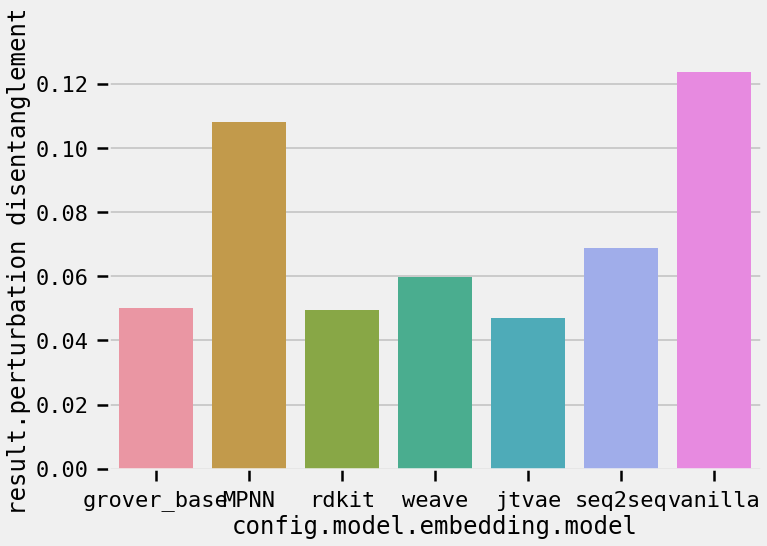

In [48]:
sn.barplot(data=results_clean, x="config.model.embedding.model", y="result.perturbation disentanglement")

<AxesSubplot:xlabel='config.model.embedding.model', ylabel='result.test_mean_de'>

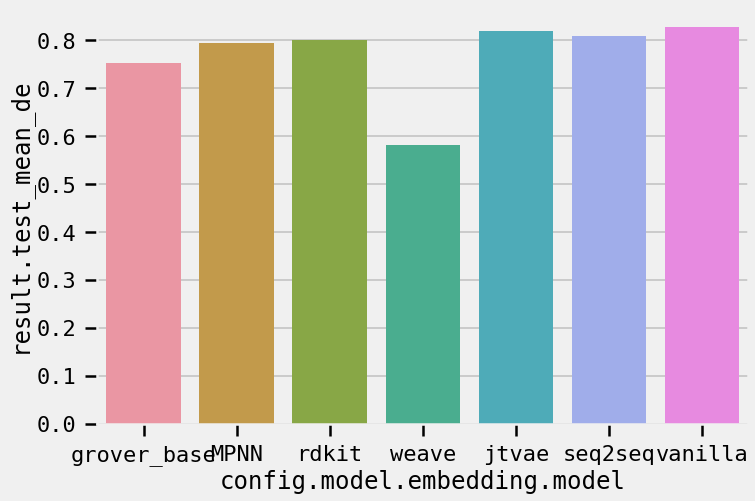

In [49]:
sn.barplot(data=results_clean, x="config.model.embedding.model", y="result.test_mean_de")